# 1. Install Dependencies and Setup

In [1]:
#! pip install tensorflow opencv-python matplotlib tensorflow-macos tensorflow-metal

In [2]:
#!pip install tensorflow --upgrade
#!pip list
!rm -r /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_faces/.DS_Store 
!rm -r /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_faces/happy/.DS_Store 
!rm -r /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_faces/sad/.DS_Store 
!rm -r /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_malware/.DS_Store 

rm: /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_faces/.DS_Store: No such file or directory
rm: /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_faces/happy/.DS_Store: No such file or directory
rm: /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_faces/sad/.DS_Store: No such file or directory
rm: /Users/ps3460/GitLab/PhD_Lab/ImageClassification/data_malware/.DS_Store: No such file or directory


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

/var/folders/6j/nngh9d8x2qxc0v7rg_1t56_00000gn/T/ipykernel_15251/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
#data_dir = 'data_faces' 
data_dir = 'data_malware' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
img_height = 256
img_width = 256
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    pad_to_aspect_ratio=False,
    color_mode='rgb',
    image_size=(img_height, img_width)
)

Found 9338 files belonging to 25 classes.


In [11]:
class_names = data.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

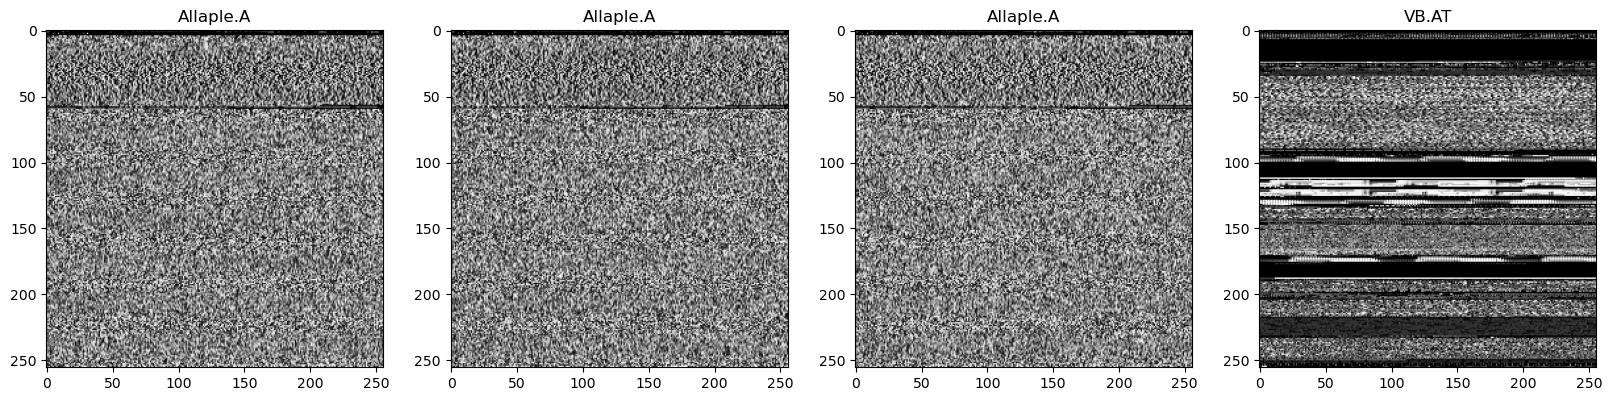

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    #ax[idx].title.set_text(batch[1][idx])
    ax[idx].title.set_text(class_names[batch[1][idx]])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator().next()

In [17]:
batch = scaled_iterator

In [18]:
len(data)

292

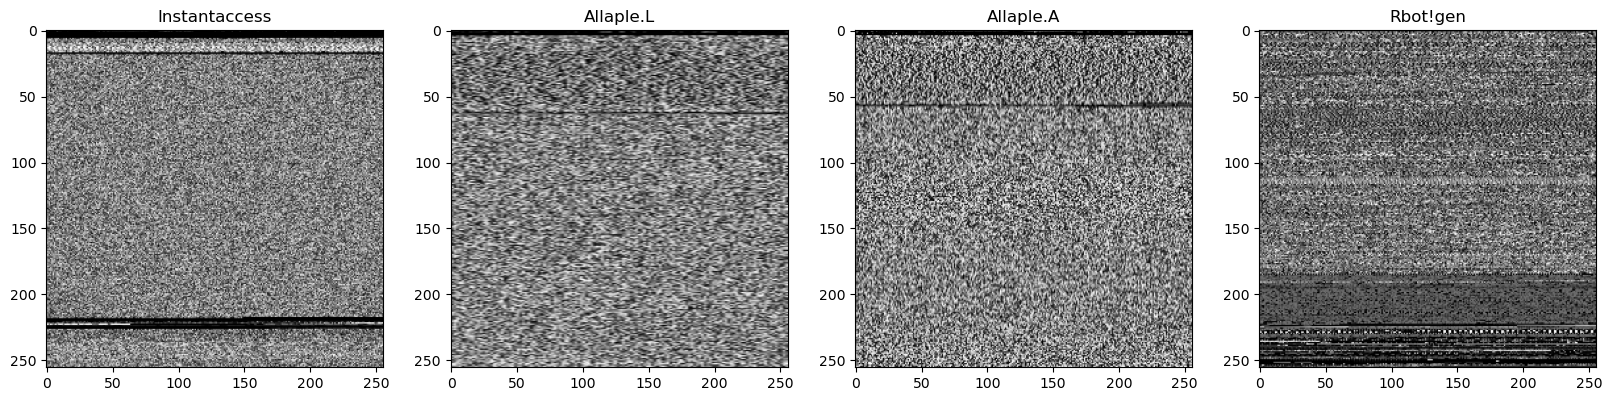

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    #ax[idx].title.set_text(batch[1][idx])
    ax[idx].title.set_text(class_names[batch[1][idx]])

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [21]:
test_size, train_size, val_size

(29, 204, 59)

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

#Orignal model

In [24]:
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding='valid'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu', padding='valid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(25, activation='sigmoid'))

model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

#EfficientNetB2

#Densenet121

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
%%time
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 286ms/step - accuracy: 0.7040 - loss: 1.1202 - val_accuracy: 0.9698 - val_loss: 0.1100
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 282ms/step - accuracy: 0.9600 - loss: 0.1389 - val_accuracy: 0.9688 - val_loss: 0.0938
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 57s 280ms/step - accuracy: 0.9745 - loss: 0.0875 - val_accuracy: 0.9793 - val_loss: 0.0851
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 284ms/step - accuracy: 0.9800 - loss: 0.0611 - val_accuracy: 0.9809 - val_loss: 0.0605
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 287ms/step - accuracy: 0.9833 - loss: 0.0490 - val_accuracy: 0.9762 - val_loss: 0.0651
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 67s 326ms/step - accuracy: 0.9878 - loss: 0.0343 - val_accuracy: 0.9820 - val_loss: 0.0543
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 67s 330ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9825 - val_loss: 0.0511
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 347ms/step - accuracy: 0.9952 - loss: 0

# 8. Plot Performance

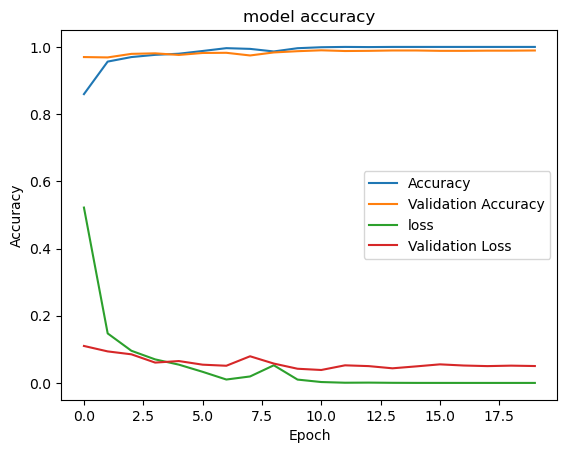

In [28]:

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])


plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
f1 = (pre.result() * re.result() *2) / (pre.result() + re.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


2024-05-22 19:47:24.266796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [1,32] vs. [1,800]


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,32] vs. [1,800] [Op:LogicalAnd] name: 

In [32]:
print(' Precision : %f' % pre.result(),'\n', 'Recall : %f' % re.result(), '\n', 'Accuracy : %f' % acc.result(), '\n','f1 : %f' % f1)

NameError: name 'f1' is not defined

# 10. Test

In [33]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This image most likely belongs to Adialer.C with a 100.00 percent confidence.


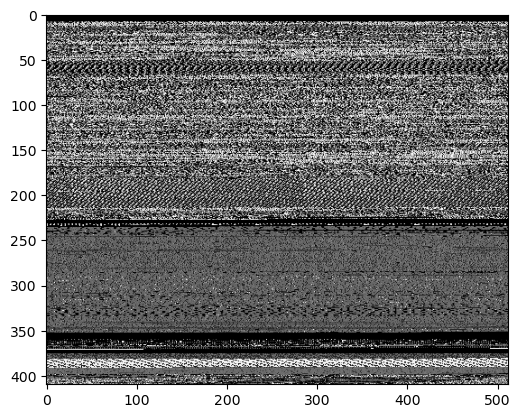

In [36]:
img = cv2.imread('Adailer.C.png')
resize = tf.image.resize(img, (256,256))
plt.imshow(img)
plt.show
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(yhat)], 100 * np.max(yhat))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image most likely belongs to Fakerean with a 100.00 percent confidence.


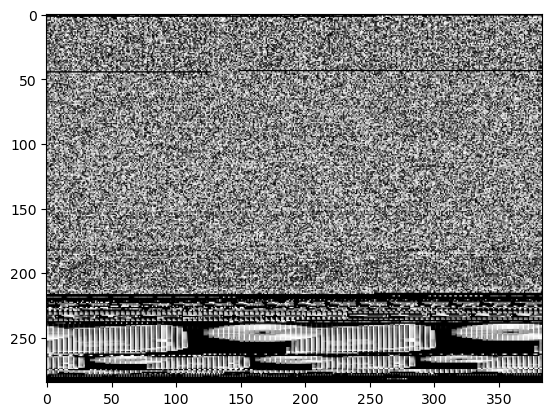

In [43]:
img = cv2.imread('fakerean.png')
resize = tf.image.resize(img, (256,256))
plt.imshow(img)
plt.show
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(yhat)], 100 * np.max(yhat))
)

# 11. Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','imageclassifier.keras'))

In [53]:
new_model = load_model(os.path.join('models','imageclassifier.keras'), custom_objects={'class_names': class_names})
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,108,381 (42.38 MB)

 Trainable params: 3,702,793 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,405,588 (28.25 MB)

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

Copy to Raspberry pi

In [44]:
!scp -P 717 models/imageclassifier.keras phil@192.168.30.100:/tmp/imageclassifier.keras

imageclassifier.keras                         100%   42MB  10.6MB/s   00:04    


In [45]:
!scp -P 717 models/imageclassifier.keras phil@192.168.30.101:/tmp/imageclassifier.keras

imageclassifier.keras                         100%   42MB  10.3MB/s   00:04    
